In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import GenoaMarket library
import GenoaMarket
#import DType to use diffrent initial scenarios
from GenoaMarket.misc import DType

In [2]:
#seed for consistancy
np.random.seed(100)
#initialize 2 Markets with N default agents
N = 200
genoa_basic = GenoaMarket.Market(N=N,init_price=100,pa=0.0002,pc=0.1)
genoa_royal = GenoaMarket.Market(N=N,init_price=100,pa=0.0002,pc=0.1)
#Initialize the market resources distribution
#start with 100 dollars per agent and 20 stocks per agent
genoa_basic.distribute(C=30_000*N,A = 300*N,dtype=DType.UNIFORM)
genoa_royal.distribute(C=30_000*N,A = 300*N,dtype=DType.ROYALTY)

In [3]:
# simulate for tau steps
tau = 10_000

genoa_basic.simulate(tau=tau)
genoa_royal.simulate(tau=tau)

Ran 10000 simulation steps for 200 agents over a period of 0:02:23.768157
Ran 10000 simulation steps for 200 agents over a period of 0:03:30.255750


In [4]:
#get the prices
basic_prices, royal_prices = np.array(genoa_basic.prices), np.array(genoa_royal.prices)
#get the log price returns
log_price_returns = lambda array : np.log(array[1:]/array[:-1])

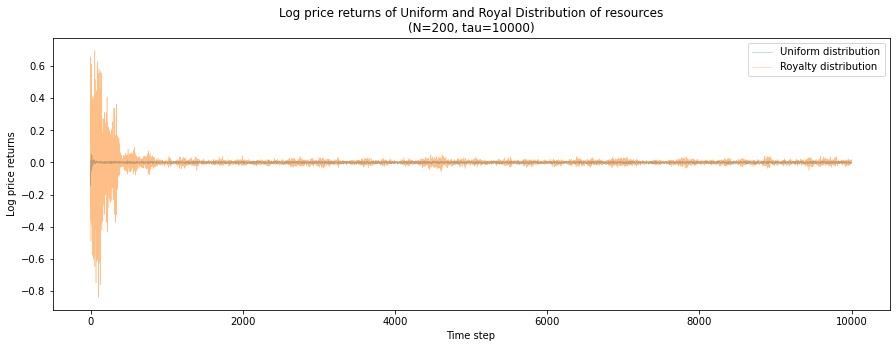

In [5]:
fig, axs = plt.subplots(figsize=(15,5))
axs.set_title(f"Log price returns of Uniform and Royal Distribution of resources\n(N={N}, tau={tau})")

#plot the two series
axs.plot(log_price_returns(basic_prices),label="Uniform distribution",linewidth=0.5,alpha=0.5)
axs.plot(log_price_returns(royal_prices),label="Royalty distribution",linewidth=0.5,alpha=0.5)

#axs.set_xlim((1,10000))
#axs.set_ylim((-0.15,0.15))
axs.set_ylabel("Log price returns")
axs.set_xlabel("Time step")
axs.legend()
plt.savefig("pics/log_price_returns.png")
plt.show()